In [51]:
from bs4 import BeautifulSoup as bs
import requests
import pymongo
from splinter import Browser
from flask import Flask, render_template, redirect
from flask_pymongo import PyMongo
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
import numpy as np

In [52]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [53]:
url='https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [55]:
browser.visit(url)
weather_html = browser.html
soup = bs(weather_html, "html.parser")

In [56]:
mars_weather_table = pd.read_html(url)
mars_weather_table

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [62]:
Mars_df=mars_weather_table[0]
Mars_df.columns = ['id', 'terrestrial_date', 'sol','ls','month','min_temp','pressure']
Mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [61]:
Mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [60]:
Mars_df['terrestrial_date']=pd.to_datetime(Mars_df['terrestrial_date'])
Mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [59]:
Months = Mars_df['month'].unique()
Months

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [58]:
# How many months exist on Mars?
len(Months)

12

In [57]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
len(Mars_df)

1867

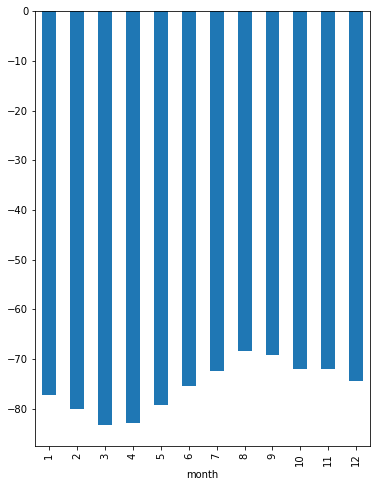

In [71]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
# Get the answer by averaging the minimum daily temperature of all the months. 
# Plot the results as a bar chart.

charted_months=Mars_df.groupby('month')
avg_min_temp=charted_months['min_temp'].mean()

temp_chart= avg_min_temp.plot(kind='bar', figsize=(6,8))

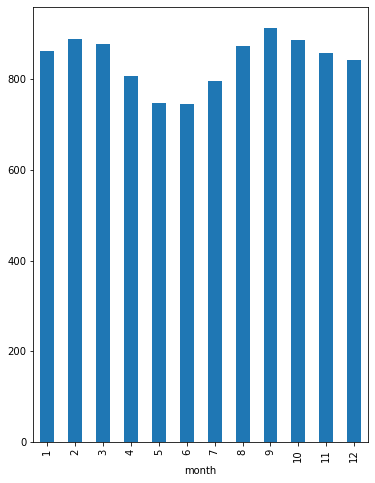

In [72]:
# Which months have the lowest and the highest atmospheric pressure on Mars? 
# Get the answer by averaging the daily atmospheric pressure of all the months. 
# Plot the results as a bar chart.

charted_months=Mars_df.groupby('month')
avg_pressure=charted_months['pressure'].mean()

temp_chart= avg_pressure.plot(kind='bar', figsize=(6,8))

In [ ]:
#  About how many terrestrial (Earth) days exist in a Martian year? 
#  That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
#  Visually estimate the result by plotting the daily minimum temperature.